# Ch 2. Machine Learning (1)
## Basics of ML

# Linear regression
> Linear regression using optimization(Gradient Descent)  
1) Generate random data of y = 0.1x + 0.3 + N(0, 0.3)   
2) Set y=Wx+b  
3) Find optimal W, b using gradient descent optimization  



In [34]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
import torch

x shape is:  (100, 1)
y shape is:  (100, 1)


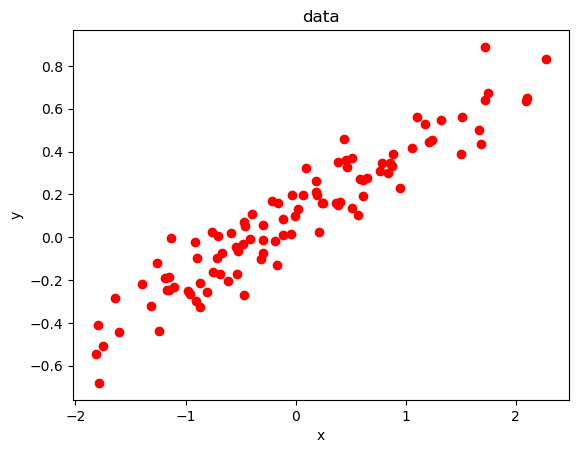

In [35]:
N = 100
theta0 = 0.1
theta1 = 0.3

x = np.random.normal(0.0, 1, N).reshape(-1, 1)
y = theta0 + theta1 * x
y = y + np.random.normal(0.0, 0.1, N).reshape(-1, 1)

print('x shape is: ', x.shape)
print('y shape is: ', y.shape)

plt.figure()
plt.plot(x, y, 'ro')
plt.title('data')
plt.xlabel('x'), plt.ylabel('y')
plt.show()

## Least Square: Solve using Linear Algebra

In [36]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)
theta = np.array((A.T * A).I * A.T * y)

print(A.shape)
print(theta)

(100, 2)
[[0.09981172]
 [0.30126851]]


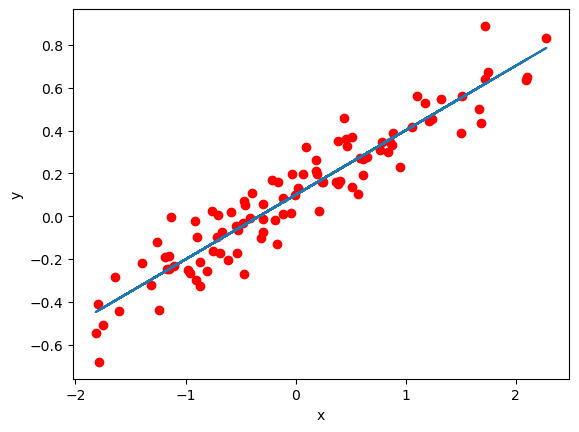

In [37]:
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, theta[1,0]*x + theta[0,0])
plt.xlabel('x'), plt.ylabel('y')
plt.show()

## Least Square: Solve using Linear Algebra + Gradient Decent

In [38]:
import numpy as np

# Initialize theta
theta = np.random.randn(2, 1)
theta = np.asmatrix(theta)

# Learning rate
alpha = 0.00001
n_iter = 3000
theta_history = []

# Gradient descent
for _ in range(n_iter):
    df = 2 * (A.T * A * theta - A.T * y)
    theta = theta - alpha * df
    theta_history.append(np.array(theta)[:,0])

print(theta)

[[0.09844777]
 [0.29585536]]


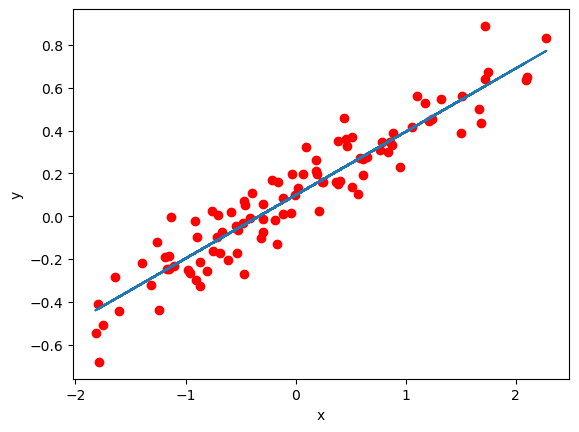

In [39]:
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, theta[1,0]*x + theta[0,0])
plt.xlabel('x'), plt.ylabel('y')
plt.show()

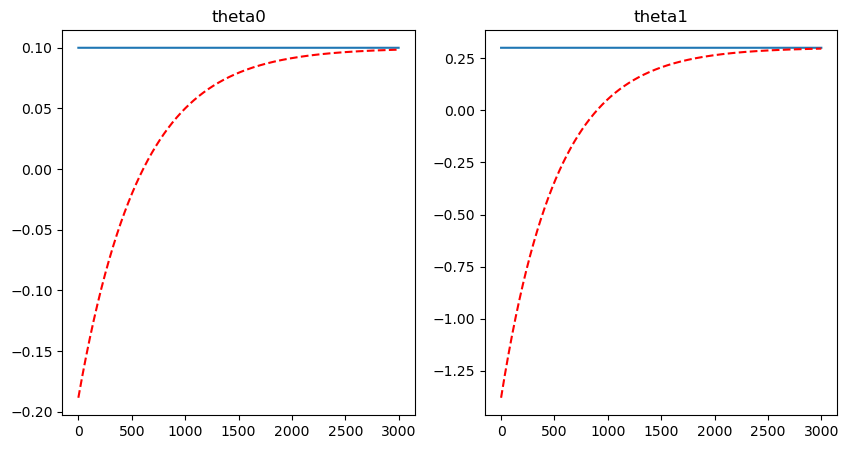

In [40]:
theta_history = np.array(theta_history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta0)
plt.plot(theta_history[:,0], 'r--')
plt.title('theta0')
plt.subplot(1,2,2)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta1)
plt.plot(theta_history[:,1], 'r--')
plt.title('theta1')
plt.show()

## Solve using Gradient Descent with Pytorch

### Go to Pytorch Basics and do the practice!

## Toy example: Gradient using Pytorch

In [41]:
theta_eval = np.array(([1], [1]))
theta_eval = np.asmatrix(theta_eval)
A = np.hstack([x**0, x])
A = np.asmatrix(A)
df = 2 * (A.T * A * theta_eval - A.T * y)
print(df)

x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).float()
theta_eval = torch.tensor(np.array((1,1)), dtype=float, requires_grad=True)
loss = ((y_tensor - (theta_eval[1]*x_tensor + theta_eval[0]))**2).sum()
loss.backward()
print('grad: ', theta_eval.grad)

[[176.84509411]
 [130.12539097]]
grad:  tensor([176.8451, 130.1254], dtype=torch.float64)


iter= 0,	 t0: -0.500964,	 t1: -0.313420,	 loss: 109.218601
iter= 10,	 t0: 0.031264,	 t1: 0.224512,	 loss: 2.603990
iter= 20,	 t0: 0.091948,	 t1: 0.291725,	 loss: 1.079746
iter= 30,	 t0: 0.098905,	 t1: 0.300086,	 loss: 1.057784
iter= 40,	 t0: 0.099707,	 t1: 0.301122,	 loss: 1.057466
iter= 50,	 t0: 0.099799,	 t1: 0.301251,	 loss: 1.057461
iter= 60,	 t0: 0.099810,	 t1: 0.301266,	 loss: 1.057461
iter= 70,	 t0: 0.099812,	 t1: 0.301268,	 loss: 1.057461
iter= 80,	 t0: 0.099812,	 t1: 0.301268,	 loss: 1.057461
iter= 90,	 t0: 0.099812,	 t1: 0.301269,	 loss: 1.057461


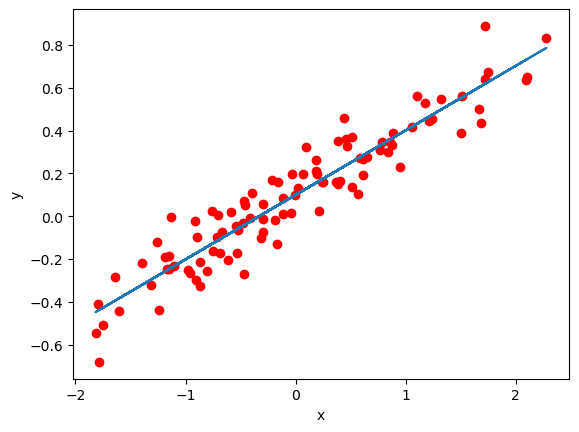

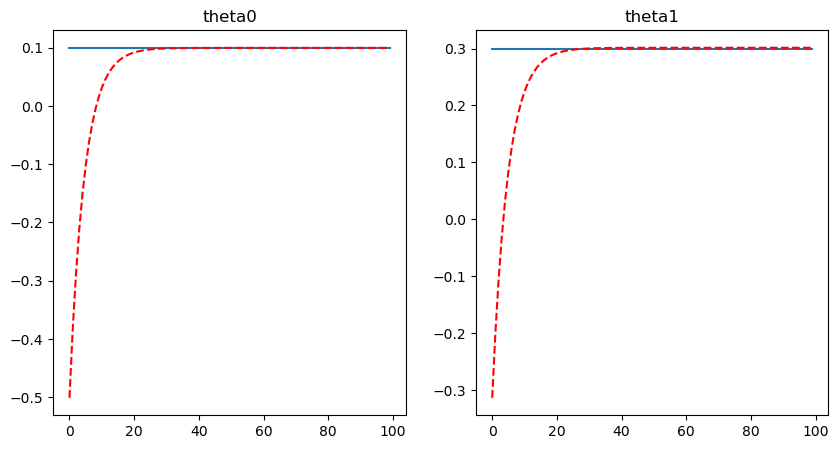

In [42]:
# Class find_theta with loss as a function
class find_theta:
    def __init__(self, x, y, n_iter = 100):
        self.x = x
        self.y = y
        self.t0 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
        self.t1 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
        self.step_size = 0.001
        self.optimizer = torch.optim.SGD([self.t1, self.t0], lr=self.step_size)
        self.n_iter = 100
        self.theta_history = []

    def loss(self):
        return ((self.y - (self.t1 * self.x + self.t0)) ** 2).sum()

    def optimize(self):
        for t in range(0, self.n_iter):
            # Calculate loss
            loss = self.loss()

            # Calculate gradient
            loss.backward()

            # This is how the optimizer actually works (theta0 and 1 are updated)
            self.optimizer.step()
            self.optimizer.zero_grad()

            # Save Log
            self.theta_history.append([self.t0.item(), self.t1.item()])
            if (t % 10 == 0):
                print('iter= {},\t t0: {:3f},\t t1: {:3f},\t loss: {:3f}'.format(t, self.t0.item(), self.t1.item(), loss.item()))
        self.theta_history = np.array(self.theta_history)
        return loss.item()

# Example usage using x_tensor and y_tensor
n_iter = 100
model = find_theta(x_tensor, y_tensor, n_iter=n_iter)
model.optimize()

theta_history = model.theta_history
t0 = model.t0
t1 = model.t1

# check data and model
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, (t1.detach().numpy()*x + t0.detach().numpy()))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

theta_history = np.array(theta_history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta0)
plt.plot(theta_history[:,0], 'r--')
plt.title('theta0')
plt.subplot(1,2,2)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta1)
plt.plot(theta_history[:,1], 'r--')
plt.title('theta1')
plt.show()

## Let's compare the results with the linear algebra

In [43]:
# parameters to optimize
# Initial value is randomly set
# requires_grad=True: take into account in the gradient

t0 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
t1 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)

# theta_math = np.asmatrix(np.concatenate([t0.detach().numpy(), t1.detach().numpy()]))

step_size = 0.001
optimizer = torch.optim.SGD([t1, t0], lr=step_size)

# Gradient Descent
n_iter = 100
theta_history = []
for t in range(0, n_iter):
    # Calculate loss
    loss = ((y_tensor - (t1*x_tensor + t0))**2).sum()
    
    # Calculate gradient
    loss.backward()
    
    ##################################################################
    # Investigate the manual gradient descent step
    # Code within this block (###) is just for the investigation, not required for the optimizer
    # Gradient using torch
    theta0_grad = t0.grad
    theta1_grad = t1.grad
    t0_manual1 = t0.item() - step_size * theta0_grad
    t1_manual1 = t1.item() - step_size * theta1_grad
    
    # Gradient using math
    theta_math = np.asmatrix(np.concatenate([t0.detach().numpy(), t1.detach().numpy()])).T
    df = 2 * (A.T * A * theta_math - A.T * y)
    theta_math = theta_math - step_size * df
    t0_manual2 = theta_math[0,0]
    t1_manual2 = theta_math[1,0]
    ##################################################################
    
    # This is how the optimizer actually works (theta0 and 1 are updated)
    optimizer.step()
    optimizer.zero_grad()
    
    # Save Log
    theta_history.append([t0.item(), t1.item()])
    if (t%10==0):
        print('iter= {},\t t0 (torch step, manual 1, 2): {:3f}, {:3f}, {:3f},\t t1 (torch step, manual 1, 2): {:3f}, {:3f}, {:3f},'\
              .format(t,t0.item(), t0_manual1.item(),t0_manual2, t1.item(), t1_manual1.item(),t1_manual2))
theta_history = np.array(theta_history)
opt = loss.item()

iter= 0,	 t0 (torch step, manual 1, 2): -0.864181, -0.864181, -0.864181,	 t1 (torch step, manual 1, 2): -0.136128, -0.136128, -0.136128,
iter= 10,	 t0 (torch step, manual 1, 2): -0.006658, -0.006658, -0.006658,	 t1 (torch step, manual 1, 2): 0.243209, 0.243209, 0.243209,
iter= 20,	 t0 (torch step, manual 1, 2): 0.087990, 0.087990, 0.087990,	 t1 (torch step, manual 1, 2): 0.293700, 0.293700, 0.293700,
iter= 30,	 t0 (torch step, manual 1, 2): 0.098492, 0.098492, 0.098492,	 t1 (torch step, manual 1, 2): 0.300295, 0.300295, 0.300295,
iter= 40,	 t0 (torch step, manual 1, 2): 0.099664, 0.099664, 0.099664,	 t1 (torch step, manual 1, 2): 0.301145, 0.301145, 0.301145,
iter= 50,	 t0 (torch step, manual 1, 2): 0.099795, 0.099795, 0.099795,	 t1 (torch step, manual 1, 2): 0.301253, 0.301253, 0.301253,
iter= 60,	 t0 (torch step, manual 1, 2): 0.099810, 0.099810, 0.099810,	 t1 (torch step, manual 1, 2): 0.301267, 0.301267, 0.301267,
iter= 70,	 t0 (torch step, manual 1, 2): 0.099812, 0.099812, 0.09981

## Solve using Scikit-Learn

[[0.30126851]]
[0.09981172]


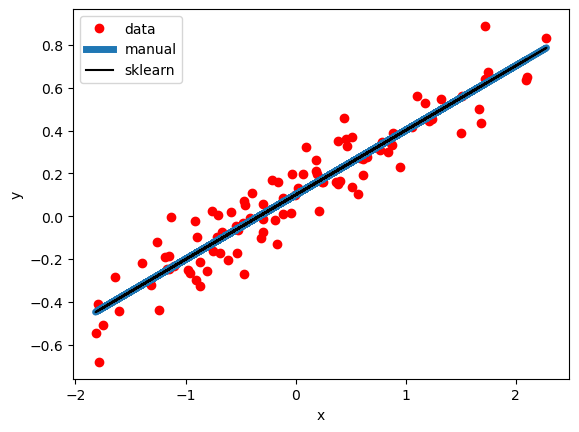

In [ ]:
from sklearn import linear_model # type: ignore
reg = linear_model.LinearRegression()
reg.fit(x, y)
print(reg.coef_)
print(reg.intercept_)

plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, reg.coef_*x + reg.intercept_, linewidth=5)
plt.plot(x, reg.predict(x), 'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data', 'manual', 'sklearn'])
plt.show()

# Linear Regression with Outliers

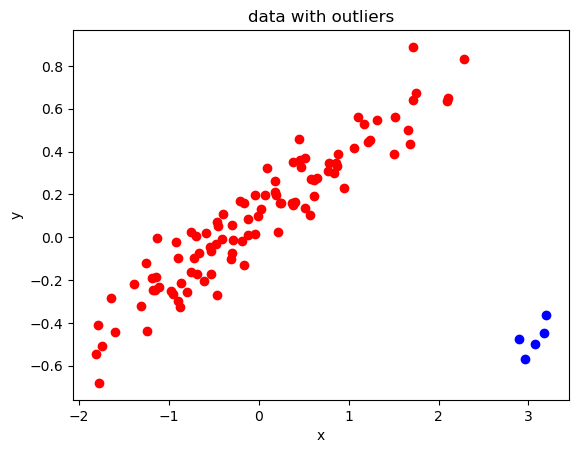

In [45]:
x_out = np.random.normal(3, 0.1, 5)
y_out = np.random.normal(-0.5, 0.1, 5)

x_outlier = np.vstack([x, x_out.reshape(-1,1)])
y_outlier = np.vstack([y, y_out.reshape(-1,1)])

# x_outlier = np.vstack([x, np.array([1, 2]).reshape(-1,1)])
# y_outlier = np.vstack([y, np.array([-0.8, -0.8]).reshape(-1,1)])
A_outlier = np.hstack([x_outlier**0, x_outlier])
A_outlier = np.asmatrix(A_outlier)

plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x_out, y_out, 'bo')
plt.title('data with outliers')
plt.xlabel('x'), plt.ylabel('y')
plt.show()

### L2 Norm

In [46]:
n_iter = 100
step_size = 0.001

x_outlier_tensor = torch.tensor(x_outlier).float()
y_outlier_tensor = torch.tensor(y_outlier).float()

model = find_theta(x_outlier_tensor, y_outlier_tensor, n_iter=n_iter)
model.optimize()

t0 = model.t0
t1 = model.t1

iter= 0,	 t0: 1.782999,	 t1: -0.645240,	 loss: 592.805730
iter= 10,	 t0: 0.235094,	 t1: 0.080453,	 loss: 14.532967
iter= 20,	 t0: 0.067714,	 t1: 0.139939,	 loss: 8.353432
iter= 30,	 t0: 0.050013,	 t1: 0.145663,	 loss: 8.285712
iter= 40,	 t0: 0.048153,	 t1: 0.146248,	 loss: 8.284968
iter= 50,	 t0: 0.047958,	 t1: 0.146308,	 loss: 8.284960
iter= 60,	 t0: 0.047937,	 t1: 0.146315,	 loss: 8.284960
iter= 70,	 t0: 0.047935,	 t1: 0.146315,	 loss: 8.284960
iter= 80,	 t0: 0.047935,	 t1: 0.146315,	 loss: 8.284960
iter= 90,	 t0: 0.047935,	 t1: 0.146315,	 loss: 8.284960


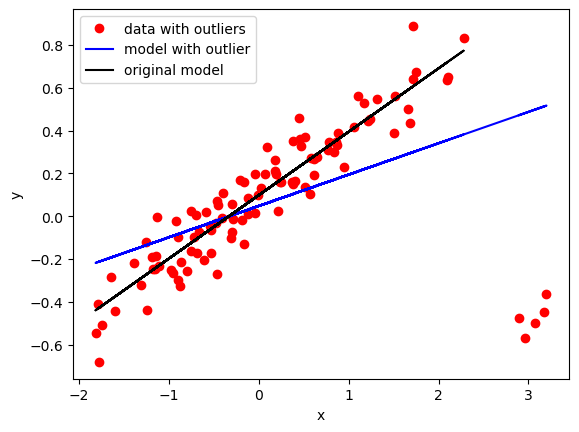

In [47]:
plt.figure()
plt.plot(x_outlier, y_outlier, 'ro')
plt.plot(x_outlier, (t1.detach().numpy()*x_outlier + t0.detach().numpy()),'b')
plt.plot(x, theta[1,0]*x + theta[0,0],'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data with outliers', 'model with outlier', 'original model'])
plt.show()

### L1 Norm

In [48]:
class find_theta_l1(find_theta):
    def loss(self):
        return (torch.abs(self.y - (self.t1 * self.x + self.t0))).sum()

iter= 0,	 t0: 0.791333,	 t1: -1.200951,	 loss: 143.203079
iter= 10,	 t0: 0.431333,	 t1: -0.462640,	 loss: 75.705178
iter= 20,	 t0: 0.123333,	 t1: 0.250675,	 loss: 11.719375
iter= 30,	 t0: 0.095333,	 t1: 0.296186,	 loss: 8.162740
iter= 40,	 t0: 0.097333,	 t1: 0.295574,	 loss: 8.163841
iter= 50,	 t0: 0.097333,	 t1: 0.293885,	 loss: 8.165298
iter= 60,	 t0: 0.097333,	 t1: 0.295574,	 loss: 8.163841
iter= 70,	 t0: 0.097333,	 t1: 0.293885,	 loss: 8.165298
iter= 80,	 t0: 0.097333,	 t1: 0.295574,	 loss: 8.163840
iter= 90,	 t0: 0.097333,	 t1: 0.293885,	 loss: 8.165298


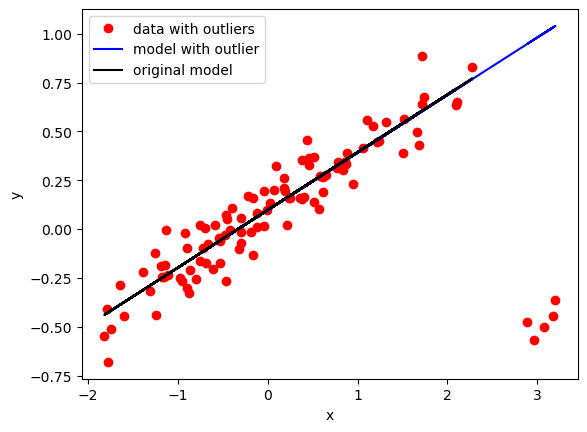

In [49]:
model = find_theta_l1(x_tensor, y_tensor, n_iter=n_iter)
model.optimize()

theta_history = model.theta_history
t0 = model.t0
t1 = model.t1

plt.figure()
plt.plot(x_outlier, y_outlier, 'ro')
plt.plot(x_outlier, (t1.detach().numpy()*x_outlier + t0.detach().numpy()),'b')
plt.plot(x, theta[1,0]*x + theta[0,0],'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data with outliers', 'model with outlier', 'original model'])
plt.show()

# Linear Classification

# Data Load

In [50]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print(np.shape(iris.data))
print('Class labels:', np.unique(y))

(150, 4)
Class labels: [0 1 2]


In [51]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Function for drawing data

In [52]:
from matplotlib.colors import ListedColormap

def draw_scatter(X, y, test_idx=None):
    plt.figure()
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

## Function for drawing decision boundary

In [53]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier=None, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    draw_scatter(X, y, test_idx=None)

    # plot the decision surface
    if classifier:
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))

        lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        lab = lab.reshape(xx1.shape)
        plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())


## Train & Test Dataset Split

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


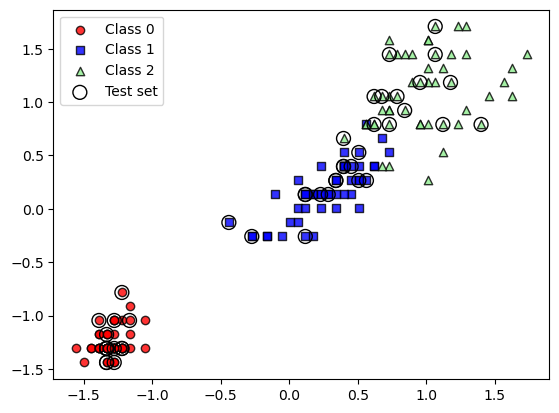

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

draw_scatter(X_combined_std, y_combined, test_idx=range(106, 150))
plt.legend(loc='upper left')

## Subset for Binary Classification

Labels counts in y (subset): [50 50]
Labels counts in y_train (subset): [35 35]
Labels counts in y_test (subset): [15 15]


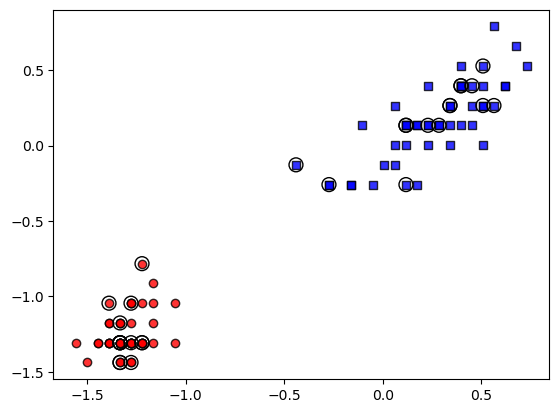

In [55]:
X_train_01 = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01 = y_train[(y_train == 0) | (y_train == 1)]

X_test_01 = X_test_std[(y_test == 0) | (y_test == 1)]
y_test_01 = y_test[(y_test == 0) | (y_test == 1)]

X_combined_01_std = np.vstack((X_train_01, X_test_01))
y_combined_01 = np.hstack((y_train_01, y_test_01))

print('Labels counts in y (subset):', np.bincount(y_combined_01))
print('Labels counts in y_train (subset):', np.bincount(y_train_01))
print('Labels counts in y_test (subset):', np.bincount(y_test_01))

draw_scatter(X_combined_01_std, y_combined_01, test_idx=range(71, 100))

# Perceptron using Gradient Decent

In [56]:
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

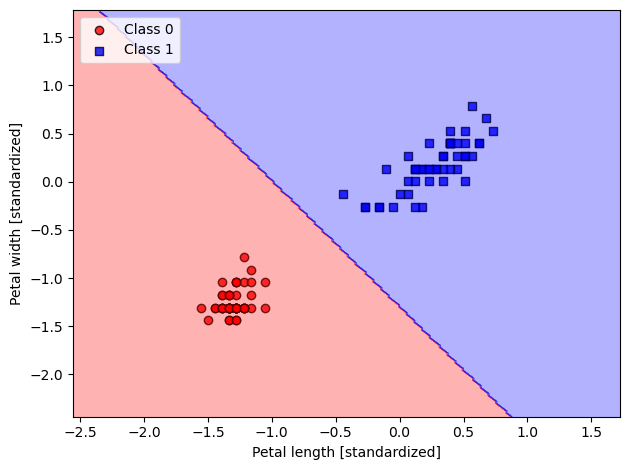

In [57]:
perc_gd = Perceptron(eta=0.3, n_iter=1000, random_state=1)
perc_gd.fit(X_train_01, y_train_01)

plot_decision_regions(X_combined_01_std, y_combined_01,
                      classifier=perc_gd, test_idx=range(np.shape(X_train_01)[0]+1, np.shape(X_combined_01_std)[0]))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Logistic Regression

In [58]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
       Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

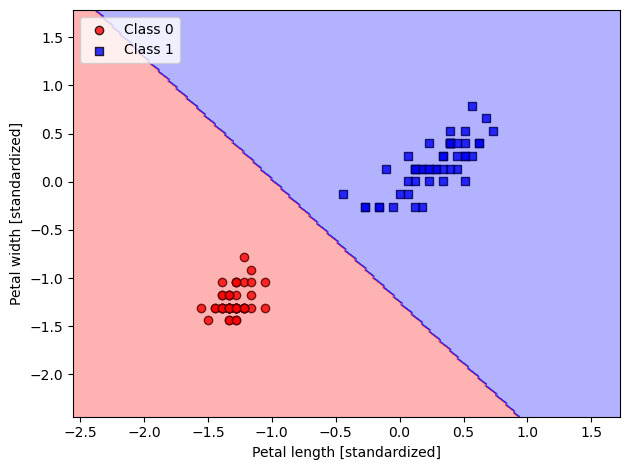

In [59]:
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01, y_train_01)

plot_decision_regions(X_combined_01_std, y_combined_01,
                      classifier=lrgd, test_idx=range(np.shape(X_train_01)[0]+1, np.shape(X_combined_01_std)[0]))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_05.png', dpi=300)
plt.show()

# Logistic Regression using Pytorch 

## Replace the gradient part using pytorch

iter=   0  loss=0.692281
iter= 100  loss=0.069717
iter= 200  loss=0.038923
iter= 300  loss=0.027525
iter= 400  loss=0.021491
iter= 500  loss=0.017723
iter= 600  loss=0.015133
iter= 700  loss=0.013236
iter= 800  loss=0.011783
iter= 900  loss=0.010633
iter= 999  loss=0.009706


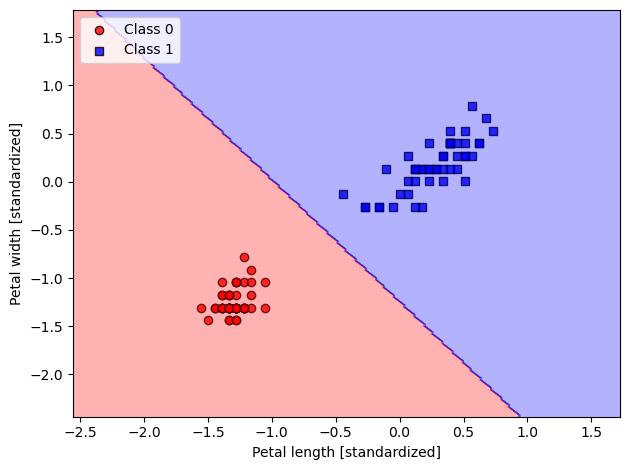

In [ ]:
class LogisticRegressionGD_Pytorch:
    """Binary Logistic Regression using manual gradient descent with PyTorch autograd only.

    Goal: Keep the simple NumPy-style public API (fit / predict) but delegate
    gradient computation to torch.autograd without using torch.nn.Module or torch.optim.

    Parameters
    ----------
    eta : float
        Learning rate.
    n_iter : int
        Number of iterations (epochs) over the whole dataset.
    random_state : int
        RNG seed for reproducible initialization.
    device : str or torch.device, optional
        'cpu' or 'cuda'. If None, auto-selects cuda when available.
    verbose : bool
        Print progress every ~10% of iterations.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1, device=None, verbose=True):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.verbose = verbose
        if device is None:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        else:
            self.device = torch.device(device)

    def _prepare(self, X, y):
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32)
        # Expect binary labels 0/1
        X_t = torch.from_numpy(X).to(self.device)
        y_t = torch.from_numpy(y).to(self.device)
        return X_t, y_t

    def fit(self, X, y):
        rng = np.random.RandomState(self.random_state)
        X_t, y_t = self._prepare(X, y)
        n_features = X_t.shape[1]

        # Initialize parameters (1D weight vector & scalar bias) with gradient tracking
        self.w_ = torch.tensor(rng.normal(0.0, 0.01, size=n_features), dtype=torch.float32,
                               requires_grad=True, device=self.device)
        self.b_ = torch.tensor(0.0, dtype=torch.float32, requires_grad=True, device=self.device)

        self.losses_ = []
        eps = 1e-8  # numerical stability for log

        report_every = max(1, self.n_iter // 10)
        for i in range(self.n_iter):
            # Forward pass
            output = self.model(X_t)
            loss = self.loss_function(y_t, output, eps)

            # Backward 
            loss.backward()
            self.w_, self.b_ = self.update_params(self.w_, self.b_)

            # Zero gradients for next step
            self.w_.grad.zero_()
            self.b_.grad.zero_()

            self.losses_.append(float(loss.item()))
            if self.verbose and (i % report_every == 0 or i == self.n_iter - 1):
                print(f"iter={i:4d}  loss={self.losses_[-1]:.6f}")

        # Detach to CPU for NumPy-based predict
        self.w_cpu_ = self.w_.detach().cpu().numpy()
        self.b_cpu_ = float(self.b_.detach().cpu().item())
        return self

    def model(self, X_t):
        logits = X_t.matmul(self.w_) + self.b_            
        output = torch.sigmoid(logits)  
        return output

    def loss_function(self, y_t, output, eps):
        # Negative Log-Likelihood
        loss = -(y_t * torch.log(output + eps) + (1 - y_t) * torch.log(1 - output + eps)).mean()
        return loss
      
    def update_params(self, w_, b_):
        with torch.no_grad():
            w_ -= self.eta * w_.grad
            b_ -= self.eta * b_.grad
        return w_, b_

    def predict(self, X):
        X = np.asarray(X, dtype=np.float32)
        z = X.dot(self.w_cpu_) + self.b_cpu_
        p1 = torch.sigmoid(torch.from_numpy(z)).numpy() # sigmoid of z (from torch)
        return (p1 >= 0.5).astype(int)

# Train & visualize with autograd-assisted version
lrgd = LogisticRegressionGD_Pytorch(eta=0.3, n_iter=1000, random_state=None, verbose=True)
lrgd.fit(X_train_01, y_train_01)

plot_decision_regions(X_combined_01_std, y_combined_01,
                      classifier=lrgd, test_idx=range(np.shape(X_train_01)[0]+1, np.shape(X_combined_01_std)[0]))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

iter=   0  loss=0.701428
iter= 100  loss=0.069787
iter= 200  loss=0.038944
iter= 300  loss=0.027535
iter= 400  loss=0.021497
iter= 500  loss=0.017727
iter= 600  loss=0.015136
iter= 700  loss=0.013239
iter= 800  loss=0.011785
iter= 900  loss=0.010634
iter= 999  loss=0.009707


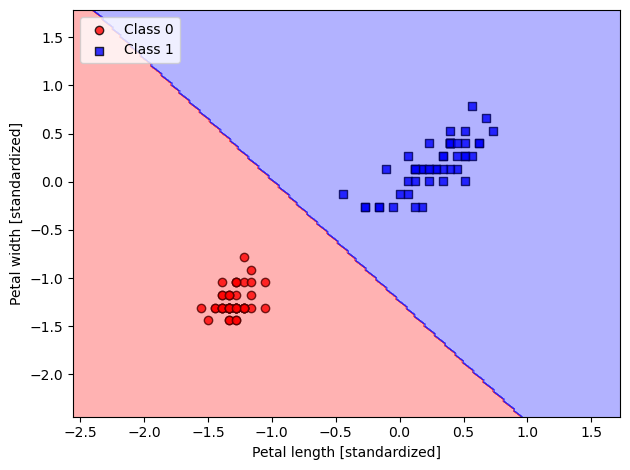

In [61]:
# Subclass version that switches the parameter update to torch.optim.SGD
class LogisticRegressionGD_Pytorch_step(LogisticRegressionGD_Pytorch):
    def update_params(self, w_, b_):
        # Lazily create optimizer on first call (after parameters exist & have grads)
        if not hasattr(self, '_optimizer'):
            self._optimizer = torch.optim.SGD([self.w_, self.b_], lr=self.eta)
        self._optimizer.step()      # apply gradient update
        return w_, b_

lrgd_opt = LogisticRegressionGD_Pytorch_step(eta=0.3, n_iter=1000, random_state=None, verbose=True)
lrgd_opt.fit(X_train_01, y_train_01)
plot_decision_regions(X_combined_01_std, y_combined_01,
                      classifier=lrgd_opt, test_idx=range(np.shape(X_train_01)[0]+1, np.shape(X_combined_01_std)[0]))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

iter=   0  loss=0.698632


iter= 100  loss=0.069759
iter= 200  loss=0.038935
iter= 300  loss=0.027530
iter= 400  loss=0.021494
iter= 500  loss=0.017725
iter= 600  loss=0.015135
iter= 700  loss=0.013237
iter= 800  loss=0.011784
iter= 900  loss=0.010633
iter= 999  loss=0.009706


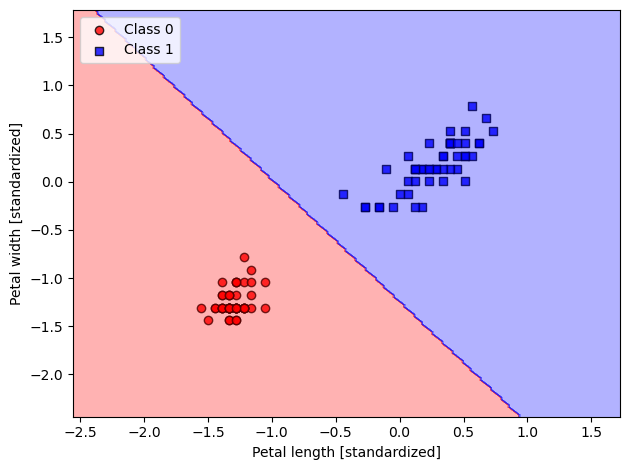

In [62]:
class LogisticRegressionGD_Pytorch_step_loss(LogisticRegressionGD_Pytorch_step):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs) # Inherit init variables from parent class
        self._criterion = torch.nn.BCEWithLogitsLoss()
    
    def model(self, X_t):
        logits = X_t.matmul(self.w_) + self.b_       
        output = logits     
        return output
    
    def loss_function(self, y_t, output, eps=None):
        loss = self._criterion(output, y_t)
        return loss

# Example usage 
lrgd_opt = LogisticRegressionGD_Pytorch_step_loss(eta=0.3, n_iter=1000, random_state=None, verbose=True)
lrgd_opt.fit(X_train_01, y_train_01)
plot_decision_regions(X_combined_01_std, y_combined_01,
                      classifier=lrgd_opt, test_idx=range(np.shape(X_train_01)[0]+1, np.shape(X_combined_01_std)[0]))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Perceptron and Logistic Regression using Scikit-Learn

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


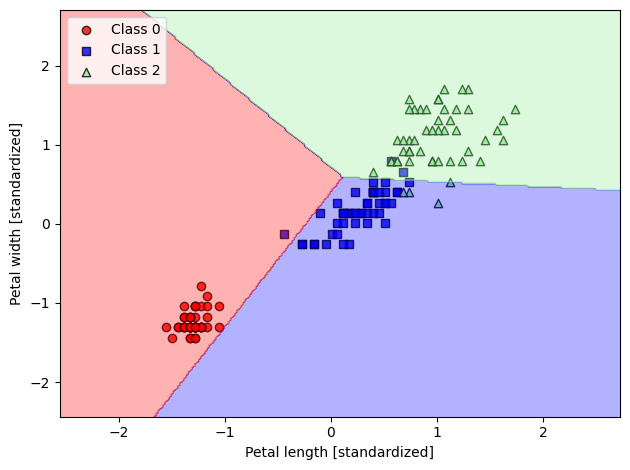

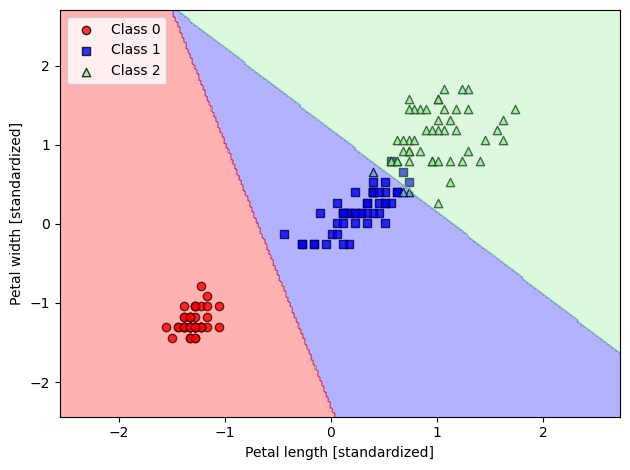

In [63]:
from sklearn.linear_model import LogisticRegression, Perceptron

perc = Perceptron(eta0=0.1, random_state=1)
perc.fit(X_train_std, y_train)

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=perc, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()